In [1]:
import re
import pandas as pd
import nltk
from matplotlib import pyplot as plt

In [2]:
# Extracting English stopwords (articles, prepositions etc.) using nltk and inserting them into set
sw_eng = set(nltk.corpus.stopwords.words('english'))
list(sw_eng)[:5]

['your', "it's", 'ma', "she's", 'below']

In [3]:
# Reading the text using reqular expression, which splits by punctuation marks, multiple spaces etc.
# Creating a dictionary with key=lowercased word, value=the number of times it occurs. Stopwords are excluded.
words = dict()
with open('alice.txt') as f:
    for line in f:
        for word in re.split(r"(\.|/|\?|>|<|!|:|;|'|\r|\n|&|,|\"|_|\(|\)|\[|\]|\s+)", line.strip().lower()):
            if word.isalpha() and word not in sw_eng:
                if word in words:
                    words[word] += 1
                else:
                    words[word] = 1

In [4]:
words_in_df = pd.DataFrame()
words_in_df['Word'] = words.keys()
words_in_df['Count'] = words.values()

In [5]:
# The most frequently used words in Alice’s Adventures in Wonderland in descending order (only 10 values are shown)
words_in_df = words_in_df.sort_values(by=['Count'], ascending=False)
words_in_df.head(10)

,Word,Count
3,alice,176
277,said,144
0,project,87
235,little,59
390,work,50
163,one,36
1,gutenberg,36
135,like,34
95,rabbit,34
1358,works,32


In [6]:
# The longest word and its number of characters
longest_word = ''
for w in words_in_df['Word']:
    if len(w) > len(longest_word):
        longest_word = w
print(longest_word, len(longest_word))

unenforceability 16


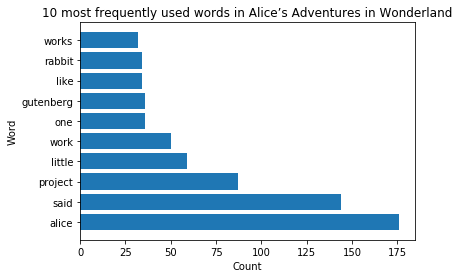

In [25]:
# 10 most frequently used words in Alice’s Adventures in Wonderland
%matplotlib inline
plt.barh(words_in_df['Word'][:10], words_in_df['Count'][:10])
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('10 most frequently used words in Alice’s Adventures in Wonderland')
plt.show()